In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

In [2]:
#forming a panda dataframe from the metadata file
data=pd.read_csv("metadata/UrbanSound8K.csv")

In [3]:
#head of the dataframe
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
#count of datapoints in each of the folders
data["fold"].value_counts()

4     990
5     936
3     925
2     888
1     873
7     838
10    837
6     823
9     816
8     806
Name: fold, dtype: int64

# DATA VISUALISATION

In [5]:
from librosa import display
import librosa

In [6]:
#feature set
#This file is of a dog bark
y,sr=librosa.load("audio/fold5/100032-3-0-0.wav")
mfccs = librosa.feature.mfcc(y, sr, n_mfcc=36)
melspectrogram =librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000)
chroma_stft=librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36)
chroma_cq =librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36)
chroma_cens =librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=876
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=438
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=219
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=110
  warnings.warn(


((36, 14), (36, 14), (36, 14), (36, 14), (36, 14))

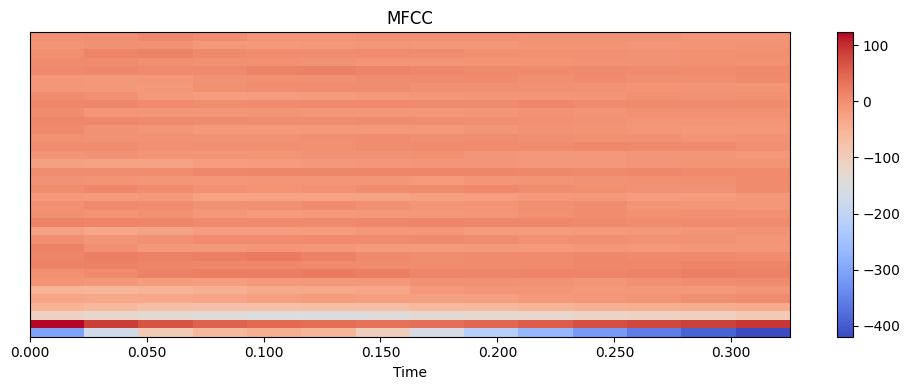

In [7]:
#MFCC of dog bark
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

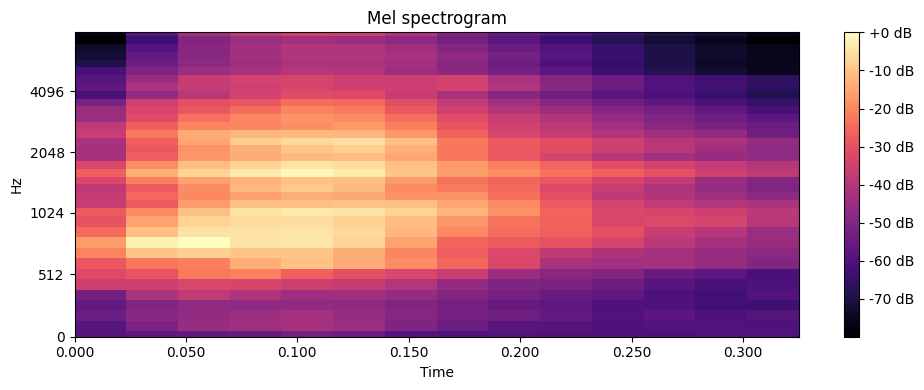

In [8]:
#Melspectrogram of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.power_to_db(melspectrogram,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

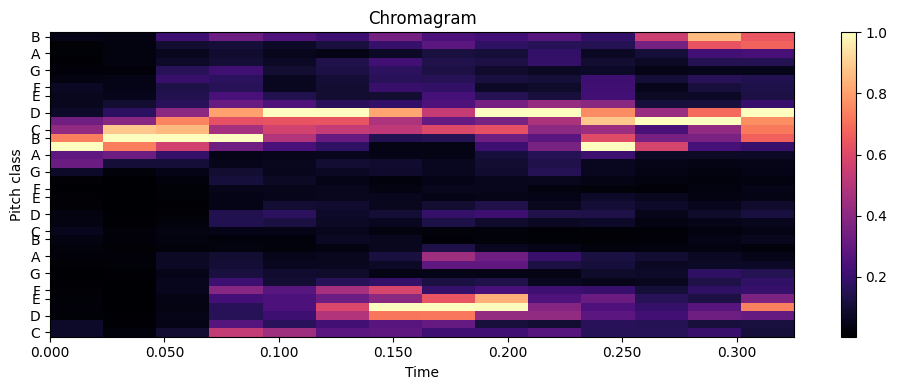

In [9]:
#Chromagram of dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_stft, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

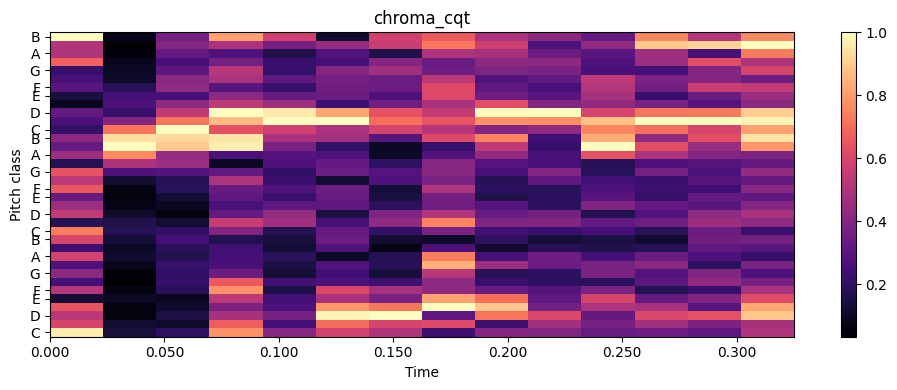

In [10]:
#Chroma cqt of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cq, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cqt')
plt.tight_layout()

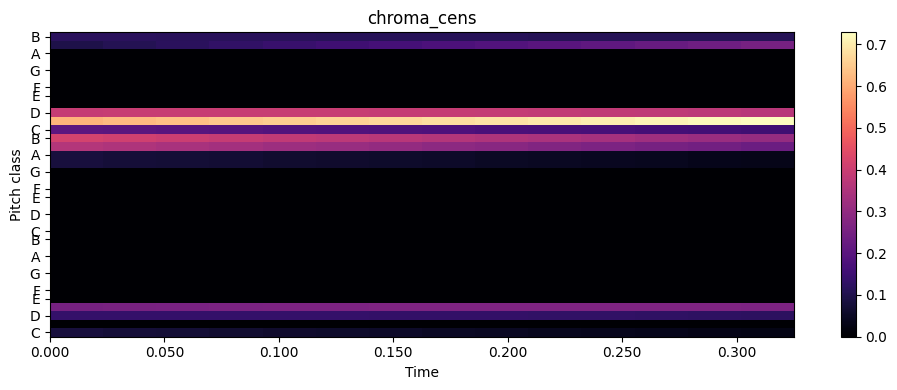

In [11]:
#Chroma cens of a dog bark
plt.figure(figsize=(10,4))
librosa.display.specshow(chroma_cens, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('chroma_cens')
plt.tight_layout()

# Data Preprocessing

In [13]:
#feature set
y,sr=librosa.load("audio/fold5/100263-2-0-137.wav")
mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
melspectrogram.shape,chroma_stft.shape,chroma_cq.shape,chroma_cens.shape,mfccs.shape

((36,), (36,), (36,), (36,), (36,))

In [14]:
#stacking and reshaping
features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
features.shape

(36, 5)

In [16]:
#preprocessing using only mfcc
x_data=[ [] for _ in range(10) ]
y_label=[ [] for _ in range(10) ]
path="audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    #print(filename)
    y,sr=librosa.load(filename)
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    #print(mfccs.shape,mfccs.max(),mfccs.min())
    x_data[int(fold_no)-1].append(mfccs)
    y_label[int(fold_no)-1].append(label)

 41%|███████████████████████████████▊                                              | 3555/8732 [13:42<15:55,  5.42it/s]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1323
  warnings.warn(
 95%|██████████████████████████████████████████████████████████████████████████▎   | 8326/8732 [31:34<00:44,  9.20it/s]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
 95%|██████████████████████████████████████████████████████████████████████████▍   | 8329/8732 [31:34<00:30, 13.16it/s]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████

In [17]:
sum([len(x) for x in x_data])

8732

In [18]:
len(data)

8732

# Augmented data

In [19]:
def standard_process(y, sr=22050):
    mfccs = np.mean(librosa.feature.mfcc(y, sr, n_mfcc=36).T,axis=0)
    melspectrogram = np.mean(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=36,fmax=8000).T,axis=0)
    chroma_stft=np.mean(librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cq = np.mean(librosa.feature.chroma_cqt(y=y, sr=sr,n_chroma=36).T,axis=0)
    chroma_cens = np.mean(librosa.feature.chroma_cens(y=y, sr=sr,n_chroma=36).T,axis=0)
    features=np.reshape(np.vstack((mfccs,melspectrogram,chroma_stft,chroma_cq,chroma_cens)),(36,5))
    return features

In [20]:
# Time stretching
def time_stretching(rate, sound_clip):
    sound_clip = librosa.effects.time_stretch(sound_clip, rate = rate)
    return standard_process(sound_clip)

In [21]:
# Pitch shifting
# tone_steps = [-2, 0, 2]
def pitch_shifting(tone_step, sound_clip, sr=22050):
    sound_clip = librosa.effects.pitch_shift(sound_clip, sr, n_steps = tone_step)
    return standard_process(sound_clip)

In [22]:
# Noise Addition
def add_noise(sound_clip):
    noise = np.random.rand(len(sound_clip))
    noise = np.ones(len(sound_clip))
    noise_amp = np.random.uniform(0.005, 0.008)
    noisy_sound_clip = sound_clip + (noise_amp * noise)
    return standard_process(noisy_sound_clip)

#examples

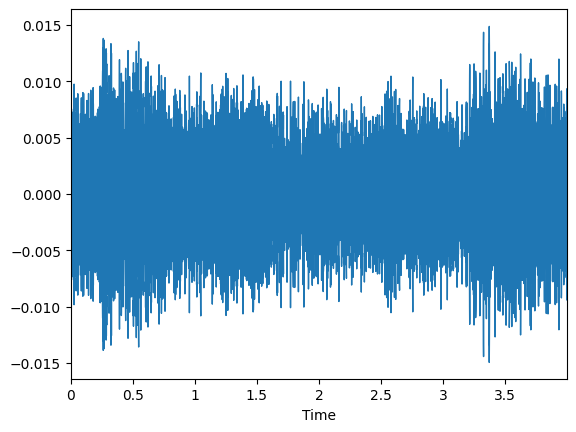

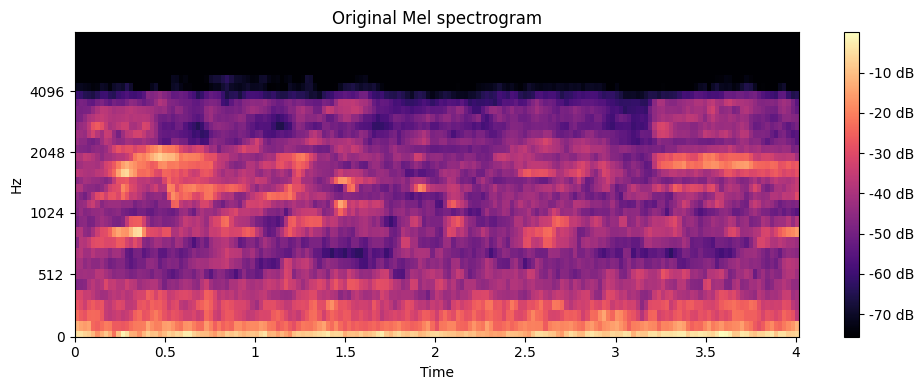

In [23]:
filename = "audio/fold5/100263-2-0-137.wav"
y, sr = librosa.load(filename)
librosa.display.waveplot(y, sr=sr)
signal = y
melspec = librosa.feature.melspectrogram(signal, n_mels = 36)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(melspec,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Mel spectrogram')
plt.tight_layout()

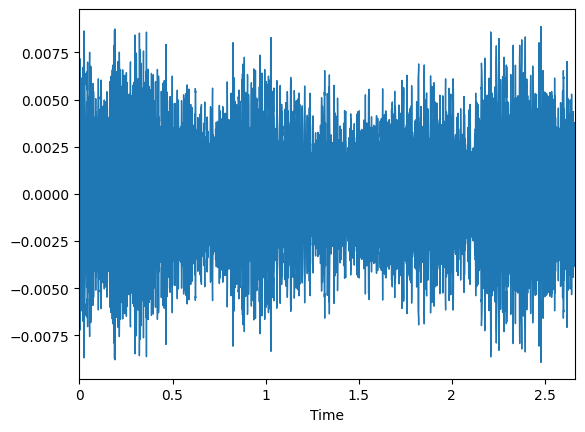

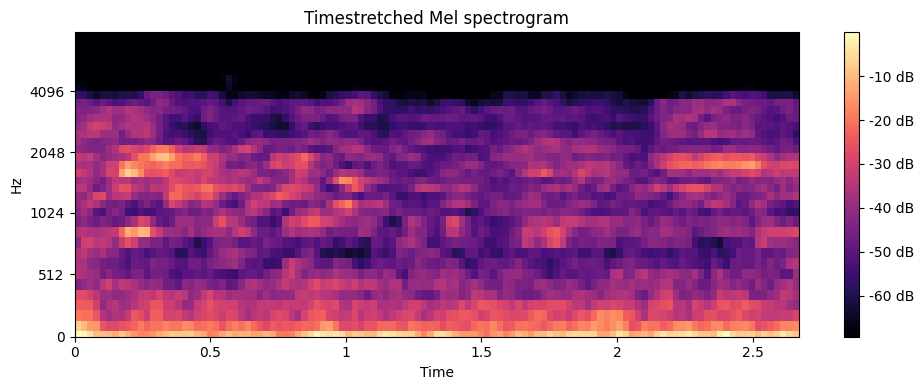

In [24]:
sound_clip = librosa.effects.time_stretch(y, rate = 1.5)
librosa.display.waveplot(sound_clip, sr=sr)
signal = sound_clip
melspec = librosa.feature.melspectrogram(signal, n_mels = 36)
plt.figure(figsize=(10,4))
librosa.display.specshow(librosa.amplitude_to_db(melspec,ref=np.max),y_axis='mel', fmax=8000,x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Timestretched Mel spectrogram')
plt.tight_layout()

In [26]:
#preprocessing using entire feature set
x_aug_data=x_data
y_aug_label=y_label
path="audio/fold"
for i in tqdm(range(len(data))):
    fold_no=str(data.iloc[i]["fold"])
    file=data.iloc[i]["slice_file_name"]
    label=data.iloc[i]["classID"]
    filename=path+fold_no+"/"+file
    y,sr=librosa.load(filename)
    
    #time-stretched
    rate=1.5
    time_stretched = time_stretching(rate, y)
    x_aug_data[int(fold_no)-1].append(time_stretched)
    y_aug_label[int(fold_no)-1].append(label)

    #pitch-shifted
    tone_step=2
    pitch_shifted = pitch_shifting(tone_step, y)
    x_aug_data[int(fold_no)-1].append(pitch_shifted)
    y_aug_label[int(fold_no)-1].append(label)
    
    #noise added
    noisy_sound = add_noise(y)
    x_aug_data[int(fold_no)-1].append(noisy_sound)
    y_aug_label[int(fold_no)-1].append(label)

  0%|                                                                                         | 0/8732 [00:00<?, ?it/s]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=584
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=292
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=146
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=73
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is 

  1%|▉                                                                            | 100/8732 [04:56<7:04:31,  2.95s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=713
  warnings.warn(
  1%|▉                                                                            | 101/8732 [04:59<6:51:52,  2.86s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=974
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=487
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=244
  warnings.warn(
C:\Users\r

  2%|█▊                                                                           | 201/8732 [09:50<6:45:53,  2.85s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=699
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=350
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=524
  warnings.warn(
  2%|█▉                                                                           | 214/8732 [10:29<7:08:47,  3.02s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=582
  warnings.warn(
C:\Users\r

C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=683
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=342
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=171
  warnings.warn(
  6%|████▉                                                                        | 560/8732 [28:51<5:27:45,  2.41s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=993
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is

C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=874
  warnings.warn(
  8%|██████▍                                                                      | 734/8732 [49:49<7:10:37,  3.23s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=749
  warnings.warn(
  8%|██████▍                                                                      | 736/8732 [49:57<7:43:19,  3.48s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=954
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=477
  warnings.warn(
C:\Users\r

C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=374
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=561
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=281
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=141
  warnings.warn(
  9%|███████▏                                                                     | 819/8732 [53:44<3:58:55,  1.81s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is

C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=538
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=269
  warnings.warn(
 10%|███████▋                                                                  | 913/8732 [1:31:11<11:46:01,  5.42s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=864
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=432
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is

C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=734
  warnings.warn(
 11%|████████                                                                   | 937/8732 [1:31:43<2:53:00,  1.33s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=955
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=478
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=120
  warnings.warn(
 11%|████████                                                                   | 942/8732 [1:31:51<3:31:42,  1.63s/it]C:\Users\r

C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1000
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=500
  warnings.warn(
 13%|█████████▋                                                                | 1145/8732 [1:40:10<6:29:43,  3.08s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=671
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=336
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 i

 16%|███████████▋                                                              | 1381/8732 [1:49:52<5:19:38,  2.61s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=896
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=448
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=672
  warnings.warn(
 16%|███████████▋                                                              | 1382/8732 [1:49:56<6:03:50,  2.97s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=813
  warnings.warn(
C:\Users\r

C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=589
  warnings.warn(
 17%|████████████▎                                                             | 1453/8732 [1:53:05<3:56:52,  1.95s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=755
  warnings.warn(
 17%|████████████▎                                                             | 1454/8732 [1:53:07<3:47:27,  1.88s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=519
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=778
  warnings.warn(
 17%|█████

C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=592
  warnings.warn(
 17%|████████████▌                                                             | 1486/8732 [1:54:11<3:45:46,  1.87s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=814
  warnings.warn(
 17%|████████████▌                                                             | 1487/8732 [1:54:13<3:37:53,  1.80s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=516
  warnings.warn(
 17%|████████████▋                                                             | 1491/8732 [1:54:19<3:25:51,  1.71s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\libros

C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=416
  warnings.warn(
 19%|█████████████▉                                                            | 1642/8732 [2:00:41<3:29:42,  1.77s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=644
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=322
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=161
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is

 21%|███████████████▎                                                          | 1809/8732 [2:28:25<4:41:09,  2.44s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=999
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=250
  warnings.warn(
 21%|███████████████▎                                                          | 1810/8732 [2:28:28<4:42:10,  2.45s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=532
  warnings.warn(
 21%|███████████████▎                                                          | 1811/8732 [2:28:30<4:38:17,  2.41s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\libros

 23%|████████████████▋                                                         | 1970/8732 [2:37:06<5:04:28,  2.70s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=150
  warnings.warn(
 23%|████████████████▋                                                         | 1971/8732 [2:37:08<4:43:19,  2.51s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=765
  warnings.warn(
 23%|████████████████▊                                                         | 1977/8732 [2:37:26<5:39:07,  3.01s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=274
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\libros

 24%|█████████████████▊                                                        | 2096/8732 [2:43:45<5:40:10,  3.08s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=205
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=103
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=614
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=307
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is

 25%|██████████████████▋                                                       | 2208/8732 [2:49:45<6:22:59,  3.52s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1470
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=92
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=46
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=69
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is t

 27%|████████████████████▎                                                     | 2397/8732 [2:59:55<4:08:25,  2.35s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=136
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=204
  warnings.warn(
 27%|████████████████████▎                                                     | 2398/8732 [2:59:57<3:57:31,  2.25s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=548
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=137
  warnings.warn(
C:\Users\r

 30%|█████████████████████▉                                                    | 2587/8732 [3:10:02<4:35:00,  2.69s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=796
  warnings.warn(
 30%|█████████████████████▉                                                    | 2589/8732 [3:10:07<4:42:43,  2.76s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=695
  warnings.warn(
 30%|█████████████████████▉                                                    | 2590/8732 [3:10:10<4:41:50,  2.75s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=550
  warnings.warn(
 30%|█████████████████████▉                                                    

 32%|███████████████████████▌                                                  | 2781/8732 [3:20:34<3:49:32,  2.31s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=693
  warnings.warn(
 32%|███████████████████████▉                                                  | 2827/8732 [3:23:02<5:18:44,  3.24s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1888
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=944
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=472
  warnings.warn(
C:\Users\

 34%|█████████████████████████▍                                                | 3001/8732 [3:38:52<3:25:43,  2.15s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=658
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=329
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=165
  warnings.warn(
 34%|█████████████████████████▍                                                | 3004/8732 [3:39:00<3:44:44,  2.35s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1003
  warnings.warn(
C:\Users\

 36%|██████████████████████████▊                                               | 3170/8732 [3:46:51<2:08:27,  1.39s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=991
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=496
  warnings.warn(
 36%|██████████████████████████▊                                               | 3171/8732 [3:46:53<2:08:39,  1.39s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=988
  warnings.warn(
 36%|██████████████████████████▉                                               | 3172/8732 [3:46:54<2:02:47,  1.33s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\libros

 41%|██████████████████████████████▌                                           | 3609/8732 [4:03:19<2:38:49,  1.86s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=961
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=481
  warnings.warn(
 41%|██████████████████████████████▋                                           | 3614/8732 [4:03:28<2:41:19,  1.89s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=664
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=996
  warnings.warn(
 41%|█████

 48%|███████████████████████████████████▏                                      | 4155/8732 [4:26:03<2:35:20,  2.04s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=521
  warnings.warn(
 48%|███████████████████████████████████▏                                      | 4158/8732 [4:26:09<2:22:02,  1.86s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=670
  warnings.warn(
 48%|███████████████████████████████████▎                                      | 4166/8732 [4:26:24<2:11:59,  1.73s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=211
  warnings.warn(
 48%|███████████████████████████████████▎                                      

 54%|███████████████████████████████████████▋                                  | 4687/8732 [4:49:47<3:20:19,  2.97s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=746
  warnings.warn(
 54%|███████████████████████████████████████▋                                  | 4688/8732 [4:49:51<3:30:59,  3.13s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1022
  warnings.warn(
 54%|███████████████████████████████████████▊                                  | 4691/8732 [4:50:01<3:34:48,  3.19s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=630
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\libro

 60%|████████████████████████████████████████████▎                             | 5236/8732 [5:13:56<2:57:53,  3.05s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=629
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=943
  warnings.warn(
 60%|████████████████████████████████████████████▌                             | 5261/8732 [5:15:02<1:45:34,  1.83s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=615
  warnings.warn(
 62%|█████████████████████████████████████████████▌                            | 5378/8732 [5:19:10<1:55:06,  2.06s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\libros

 70%|███████████████████████████████████████████████████▋                      | 6099/8732 [5:48:56<1:27:38,  2.00s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=815
  warnings.warn(
 70%|███████████████████████████████████████████████████▊                      | 6108/8732 [5:49:12<1:09:32,  1.59s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=920
  warnings.warn(
 70%|███████████████████████████████████████████████████▉                      | 6130/8732 [5:50:01<1:43:32,  2.39s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=992
  warnings.warn(
 70%|████████████████████████████████████████████████████                      

 83%|█████████████████████████████████████████████████████████████▍            | 7257/8732 [6:38:06<1:23:28,  3.40s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=949
  warnings.warn(
 85%|████████████████████████████████████████████████████████████████▎           | 7388/8732 [6:45:29<59:36,  2.66s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=627
  warnings.warn(
 85%|████████████████████████████████████████████████████████████████▎           | 7389/8732 [6:45:32<59:28,  2.66s/it]C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1006
  warnings.warn(
C:\Users\ramya\AppData\Local\Programs\Python\Python310\lib\site-packages\libro

In [27]:
import pickle as pkl

with open("x_data.pickle","wb") as f:
    pkl.dump(x_data, f)

with open("y_label.pickle","wb") as f:
    pkl.dump(y_label, f)

In [28]:
with open("x_aug_data.pickle","wb") as f:
    pkl.dump(x_aug_data, f)

with open("y_aug_label.pickle","wb") as f:
    pkl.dump(y_aug_label, f)